In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archive.csv')
df.columns

Index(['Year', 'Month', 'Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)'],
      dtype='object')

In [3]:
df.drop(columns=['Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Seasonally Adjusted CO2 Fit (ppm)'], inplace = True)
df['Measure Time'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=15))
df.drop(columns=['Year', 'Month'], inplace = True)
df=df.set_index('Measure Time')
df

,Carbon Dioxide Fit (ppm)
Measure Time,
1958-01-15,NaN
1958-02-15,NaN
1958-03-15,316.18
1958-04-15,317.30
1958-05-15,317.83
...,...
2017-08-15,NaN
2017-09-15,NaN
2017-10-15,NaN


In [4]:
df=df.dropna()

<AxesSubplot:xlabel='Measure Time'>

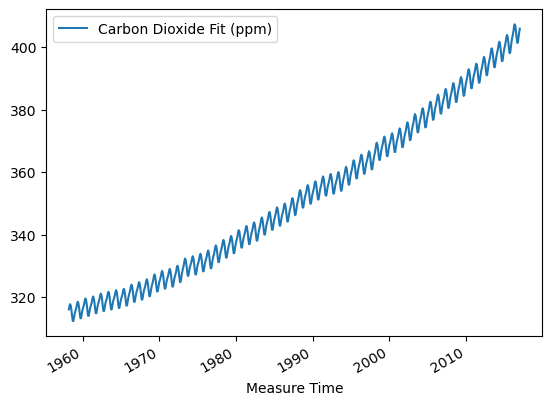

In [5]:
df.plot()

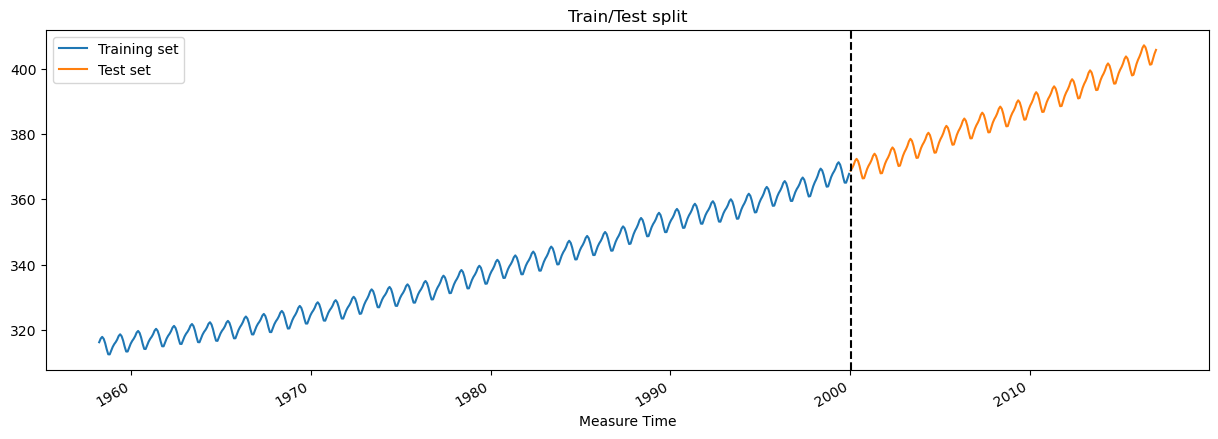

In [6]:
# Train/Test Split
train=df.loc[df.index < '2000-01-15']
test=df.loc[df.index >= '2000-01-15']
fig,ax = plt.subplots (figsize=(15,5))
train.plot(ax=ax, label='Training set', title = 'Train/Test split')
test.plot(ax=ax, label='Test set')
ax.axvline('2000-01-15', color='black', ls='--')
ax.legend(['Training set','Test set'])
plt.show()

# Auto ARIMA

In [8]:
# Auto-fit the ARIMA model
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [9]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 -39.190
Date:                Fri, 19 May 2023   AIC                             92.381
Time:                        16:20:53   BIC                            121.897
Sample:                             0   HQIC                           103.962
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0333      0.003     10.006      0.000       0.027       0.040
ar.L1          1.3982      0.042     33.212      0.000       1.316       1.481
ar.L2         -0.7133      0.039    -18.478      0.000      -0.789      -0.638
ma.L1          0.8647      0.028     30.495      0.000       0.809       0.920
ma.L2         -0.8714      0.022    -40.218      0.000      -0.914      -0.829
ma.L3         -0.8356      0.029    -28.377      0.000      -0.893      -0.778
sigma2         0.0659      0.005     13.091      0.000       0.056       0.076
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):                27.71
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.57
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\vy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vy\AppData\Local\Temp\ipykernel_14240\3986055903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)


<AxesSubplot:xlabel='Measure Time'>

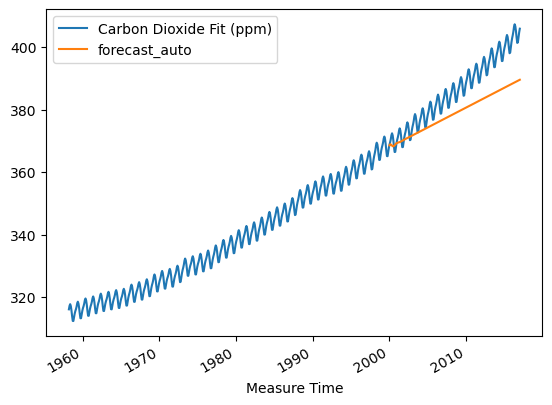

In [10]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

df.plot()